# Exploratory Data Analysis 0: Initial Data Analysis

Initial data analysis is a subset of exploratory data analysis which focuses on making the data fit to be put into a model. This means dealing with non-existant values, normalizing as necescary, and completing other tasks as necescary by the final model to be used.

Huebner, Vac, Cessie (2016) concluded that there were three main parts of IDA:

1.  Data cleaning - eliminating inconsistencies

2.  Data screening - describing the data

3.  Data reporting - documenting step 2

Sources:
https://reader.elsevier.com/reader/sd/pii/S0022522315017948?token=E85E57F81B03A15524B9F114673CAF3F3F0FF45188AA953EB7FDD8195887A04325990D11A24383AC4424F669BB95EDAE

https://towardsdatascience.com/dealing-with-missing-data-17f8b5827664 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/

In [3]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pathlib

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Initializing data
vg_df = pd.read_csv(pathlib.Path('vgsales.csv'))

In [5]:

vg_df.dtypes
vg_df.describe()

InteractiveShell.ast_node_interactivity = "last_expr"

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Check for duplicates

In [6]:
# Check for duplicates
duplicate_bool_ser = vg_df.duplicated(keep = False)

duplicate_bool_ser[duplicate_bool_ser == True]

Series([], dtype: bool)

### Check for Nonexistant Values/Nones (grouped together as nulls) and other unknowns

[179, 377, 431, 470, 607, 624, 649, 652, 711, 782, 1126, 1133, 1303, 1433, 1498, 1513, 1585, 1649, 1662, 1697, 1837, 1990, 2019, 2086, 2113, 2114, 2134, 2145, 2173, 2222, 2286, 2295, 2415, 2422, 2484, 2497, 2528, 2586, 2776, 2786, 2838, 2947, 3049, 3141, 3159, 3166, 3194, 3217, 3238, 3346, 3421, 3468, 3501, 3715, 3753, 3766, 3880, 3952, 4145, 4151, 4199, 4232, 4330, 4378, 4380, 4469, 4472, 4526, 4536, 4635, 4683, 4791, 4797, 4858, 4865, 4934, 5061, 5078, 5162, 5171, 5195, 5196, 5240, 5302, 5508, 5618, 5625, 5647, 5657, 5669, 5769, 5798, 5838, 5861, 5870, 5901, 5913, 6042, 6125, 6153, 6195, 6211, 6272, 6283, 6314, 6316, 6319, 6401, 6437, 6496, 6562, 6647, 6648, 6777, 6806, 6832, 6849, 6919, 6926, 6937, 6966, 6968, 7035, 7181, 7208, 7213, 7351, 7369, 7370, 7382, 7406, 7423, 7470, 7615, 7648, 7720, 7908, 7946, 7953, 8044, 8086, 8157, 8167, 8204, 8223, 8313, 8330, 8334, 8341, 8368, 8376, 8439, 8503, 8553, 8620, 8707, 8760, 8770, 8848, 8896, 8899, 8929, 9081, 9151, 9171, 9251, 9310, 9392, 9

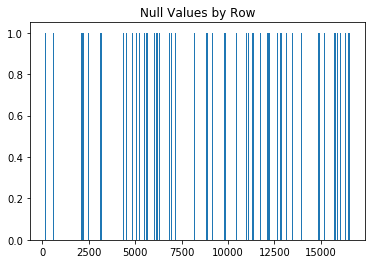

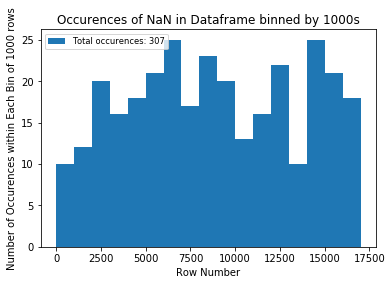

,NaNs_in_Rank,NaNs_in_Name,NaNs_in_Platform,NaNs_in_Year,NaNs_in_Genre,NaNs_in_Publisher,NaNs_in_NA_Sales,NaNs_in_EU_Sales,NaNs_in_JP_Sales,NaNs_in_Other_Sales,NaNs_in_Global_Sales
0,0,0,0,271,0,58,0,0,0,0,0


In [7]:
# Plotting the locations of the NaNs by row

    # Note: converting from list-->dict-->list eliminates duplicates bc dict do not allow repeats in the their keys
nan_locs = list(dict.fromkeys(vg_df[vg_df.isnull().any(axis = 1)].index.tolist()))

print(nan_locs)
print(len(nan_locs))
print(len(vg_df[vg_df.isnull().any(axis = 1)].index.tolist()))

plt.bar(nan_locs, 1, width = 10)
plt.title("Null Values by Row")
plt.show()

# Binned by thousands

plt.hist(np.array(nan_locs), bins = 17, range = (0.0, 17000.0))
plt.title('Occurences of NaN in Dataframe binned by 1000s')
plt.xlabel('Row Number')
plt.ylabel('Number of Occurences within Each Bin of 1000 rows')
plt.legend([f'Total occurences: {len(nan_locs)}'], loc = 'upper left', fontsize = 'small')
plt.show()

# Table of where the NaNs are located

NaN_count_col_df = pd.DataFrame()
for col in vg_df.columns:
    NaN_count_col_df[f'NaNs_in_{col}'] = [vg_df[col].isnull().values.sum()]
NaN_count_col_df

Word:  unknown
in Column:  Publisher
[  940  1649  2114  2173  2236  2286  2295  2328  2484  2491  2497  2544
  2776  2786  2829  3030  3468  3501  3702  4121  4536  4683  4797  4865
  5171  5195  5618  5625  5669  5861  5913  6021  6042  6211  6276  6401
  6407  6647  6777  6832  6919  6968  7035  7253  7314  7372  7382  7521
  7936  8044  8086  8136  8157  8167  8204  8223  8313  8505  8620  8707
  8825  8844  8929  8975  9081  9151  9171  9202  9205  9251  9522  9667
  9769  9815  9820  9821  9840  9868  9882  9997 10194 10242 10272 10357
 10554 10559 10733 10758 10792 11107 11275 11323 11455 11543 11600 11798
 11889 12015 12027 12059 12127 12135 12184 12212 12298 12307 12531 12533
 12666 12749 12879 12898 12915 12929 13069 13111 13143 13471 13585 13642
 13709 13733 13736 13757 13810 13820 13870 13930 13983 14030 14046 14056
 14098 14109 14156 14181 14249 14254 14273 14293 14312 14352 14371 14377
 14404 14473 14522 14561 14576 14617 14640 14676 14696 14760 14774 14844
 14845 14849 1

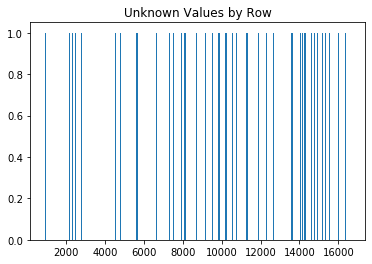

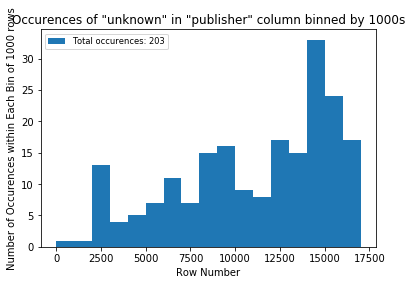

In [8]:
InteractiveShell.ast_node_interactivity = "all"

# Found synonyms of null, unknown, nonexistant, n/a, not any etc that might be present in a dataset

null_synonyms = ['unknown', 'untold', 'undetermined', 'undefined', 'hidden', 'indefinite', 'pending', 'inconclusive', 'unnamed', 'undesignated', 'insignificant', 'nonexistant', 'non-existant', 'missing', 'absent', 'unavailable', 'nonexistent', 'withdrawn', 'null', 'invalid', 'void', 'rescinded', 'repealed', 'blank', 'empty', 'canceled', 'revoked', 'rescinded', 'not any', 'n/a', 'None', 'nan', 'excluded',]

# Select columns with dtype 'object' and converting all strings to lowercase
obj_cols = ['Name', 'Platform', 'Genre', 'Publisher']

obj_vg_df = pd.DataFrame(dtype = 'object')
for col in obj_cols:
    obj_vg_df[col] = vg_df[col].str.lower()

# Recording where the word occus

for word in null_synonyms:
    for col in obj_cols:
        if True in (obj_vg_df[col] == word).values:
            print('Word: ',word)
            print('in Column: ',col)
            print(np.array(obj_vg_df.index[obj_vg_df[col] == word].tolist()))
            # The output list tells us that the only occurence of a synonym of null was 'unknown' in the 'publisher column'

# Plotting the locations of the 'unknown's by row

unknown_indices = obj_vg_df.index[obj_vg_df['Publisher'] == 'unknown'].tolist()

plt.bar(unknown_indices, 1, width = 10)
plt.title("Unknown Values by Row")
plt.show()

# Binned by thousands

plt.hist(np.array(unknown_indices), bins = 17, range = (0.0, 17000.0))
plt.title('Occurences of "unknown" in "publisher" column binned by 1000s')
plt.xlabel('Row Number')
plt.ylabel('Number of Occurences within Each Bin of 1000 rows')
plt.legend([f'Total occurences: {len(unknown_indices)}'], loc = 'upper left', fontsize = 'small')
plt.show()

### How to deal with these NaN and unknown values?
Simple options:
* Delete the features with NaN and unknown values from the dataset entirely
* Delete rows with those features missing
* Delete the chunk of rows with those features missing
* Turn NaN/unknown into a category
  * Eg., if options for publishers are 'Nintendo', 'Sega' etc add a new option of 'unknown'
* Replace with mean, median or mode
  * Not possible because NaNs and unknowns only occur in categorical data

From Kang (2013):
* Missing at Random Data: randomly missing, however affected by the surrounding data
* Missing Completely at Random: randomly missing without consideration for the surrounding data


* Listwise/Case deletion (same as above)
* Pairwise deletion (only delete information that is associated with the missing data)
* Mean substitution (same as above)
* Last observed value from same subject
* Maximum likelihood estimation (with normal distribution)
* Multiple imputation
* Single imputation

**In this case, it is most logical to simply delete the rows with unknown data because it cannot be easily imputed and the number of rows to be excluded is small.**

In [9]:
nan_locs = list(dict.fromkeys(vg_df[vg_df.isnull().any(axis = 1)].index.tolist()))
unknown_indices = obj_vg_df.index[obj_vg_df['Publisher'] == 'unknown'].tolist()

# Determine the total number of unique rows that will be excluded 

total_nulls = list(dict.fromkeys(nan_locs + unknown_indices))

print('number of (unique) rows containing NaNs: ', len(nan_locs), 'number of (unique) rows containing "unknown": ', len(unknown_indices), 'number of (unique) rows containing NaN and/or "unknown": ', len(total_nulls))

# Excluding rows with NaN or unknown

case_deletion_indices = []

for i in vg_df.index:
    if i in nan_locs or i in unknown_indices:
        continue
    else:
        case_deletion_indices.append(i)
case_del_vg_df = vg_df.iloc[case_deletion_indices]

# Comparison of original df and new df

print('\n Original Df') 
vg_df.describe()

print('Df with rows deleted')
case_del_vg_df.describe()

number of (unique) rows containing NaNs:  307 number of (unique) rows containing "unknown":  203 number of (unique) rows containing NaN and/or "unknown":  407

 Original Df


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Df with rows deleted


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16191.000000,16191.000000,16191.000000,16191.000000,16191.000000,16191.000000,16191.000000
mean,8266.581002,2006.383732,0.266943,0.148414,0.079115,0.048664,0.543409
std,4787.519132,5.833054,0.824741,0.510715,0.312686,0.190624,1.571720
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4115.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8260.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12403.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Overall, the row deletions did not change the measures of central tendency for each feature very much, indicating that it was apt
* Interestingly, the means for the sales features went up. This indicates that incomplete data was most present in games that did not sell well, as you may logically expect.

In [32]:

case_del_vg_df.head()
vg_df_documentation = pd.DataFrame()
vg_df_documentation['Column_Name'] = case_del_vg_df.columns
vg_df_documentation['Data_Type'] = ['string (object)' if str(i).lower() == 'object' else i for i in case_del_vg_df.dtypes]
vg_df_documentation['Num_Unique_Values'] = [len(list(dict.fromkeys(case_del_vg_df[col]))) for col in case_del_vg_df.columns]

unique_platform_values = list(dict.fromkeys(case_del_vg_df['Platform']))
unique_genre_values = list(dict.fromkeys(case_del_vg_df['Genre']))

comments_dict = {
    'Rank' : 'This is the ranking of the game',
    'Name' : 'Name of the game',
    'Platform' : f'This is the video game system the game was made for. {unique_platform_values}',
    'Year' : f'The year the game was created, between {case_del_vg_df.Year.min()} and {case_del_vg_df.Year.max()}',
    'Genre' : f'The type of game. {unique_genre_values}',
    'Publisher' : f'The company who published the game',
    'NA_Sales' : f'Sales in millions in North America (CA, US, MX, etc)',
    'EU_Sales' : f'Sales in millions from European Union countries',
    'JP_Sales' : f'Sales in millions from Japan',
    'Other_Sales': f'Sales in millions in other regions of the world',
    'Global_Sales' : f'Total sales from world, in millions. Generally the sum of all previous sales categories.'
}

vg_df_documentation['Comments'] = comments_dict.values()


# Make maximum column width of pandas dataframe unlimited
pd.set_option('display.max_colwidth', -1)
vg_df_documentation



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


,Column_Name,Data_Type,Num_Unique_Values,Comments
0,Rank,int64,16191,This is the ranking of the game
1,Name,string (object),11247,Name of the game
2,Platform,string (object),31,"This is the video game system the game was made for. ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC', 'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']"
3,Year,float64,39,"The year the game was created, between 1980.0 and 2020.0"
4,Genre,string (object),12,"The type of game. ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']"
5,Publisher,string (object),575,The company who published the game
6,NA_Sales,float64,408,"Sales in millions in North America (CA, US, MX, etc)"
7,EU_Sales,float64,305,Sales in millions from European Union countries
8,JP_Sales,float64,244,Sales in millions from Japan
9,Other_Sales,float64,157,Sales in millions in other regions of the world
